# Objective

**Day 22 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 22. animation**
    
Data used: https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/sea-level-data/

# Setup

In [1]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import matplotlib as mpl
import imageio
import PIL

# Read Data

In [2]:
filepath = '../../SL_Plots/Data/jb_iby_sry_gtn_giy_SP.nc'
sl = xr.open_dataset(filepath)
# read variables
lats = sl.variables['lat'].values
lons = sl.variables['lon'].values
date = sl.variables['time'].values
height = sl.variables['height'].values # sea level height
gmsl = sl.variables['gmsl'].values # global mean sea level
sl.close()

# Prepare Data

In [3]:
# subtract global mean for each time step
height_minus_gm = np.zeros(shape=(len(date),len(lats),len(lons)))
for i in range(len(lats)):
    for j in range(len(lons)):
        height_minus_gm[:,i,j] = height[:,i,j] - gmsl[:]

# Plots

In [4]:
height_minus_gm[0,:,:]

array([[ -44.,  -38.,   nan, ...,   27.,   28.,   28.],
       [ -26.,  -23.,  -19., ...,   23.,   24.,   24.],
       [ -19.,  -18.,  -16., ...,   20.,   19.,   20.],
       ...,
       [ -99., -103., -107., ...,   nan,   nan,   nan],
       [ -97.,  -99., -103., ...,   nan,   nan,   nan],
       [ -94.,  -97., -100., ...,   nan,   nan,   nan]])

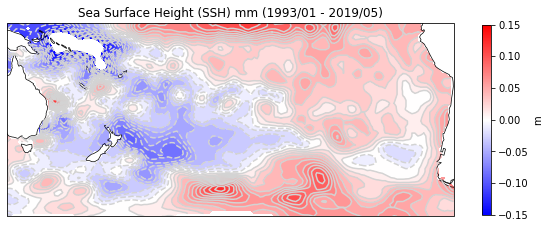

In [5]:
cmap = plt.cm.bwr
levels = np.arange(-.15,.15,0.01)
norm = mpl.colors.Normalize(vmin=-.15, vmax=.15)

PROJECTION = ccrs.PlateCarree(central_longitude=140.0, globe=None)
llons, llats = np.meshgrid(lons, lats)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax = plt.subplot(111, projection=PROJECTION)
ax.set_title('Sea Surface Height (SSH) mm (1993/01 - 2019/05)')
#ax.set_global()
ax.add_feature(cfeature.COASTLINE, linewidths=0.7)
ax.contourf(llons, llats, height_minus_gm[0,:,:]/1000, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels)
ax.contour(llons, llats, height_minus_gm[0,:,:]/1000, transform=ccrs.PlateCarree(),colors="lightgrey", levels=levels)#, linestyles="solid", linewidths=1.5, colors="grey")
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), shrink=.7)
cbar.set_label('m')
#plt.savefig("../plots/day22.png", bbox_inches = 'tight')
plt.show()

# Animation

<IPython.core.display.Javascript object>


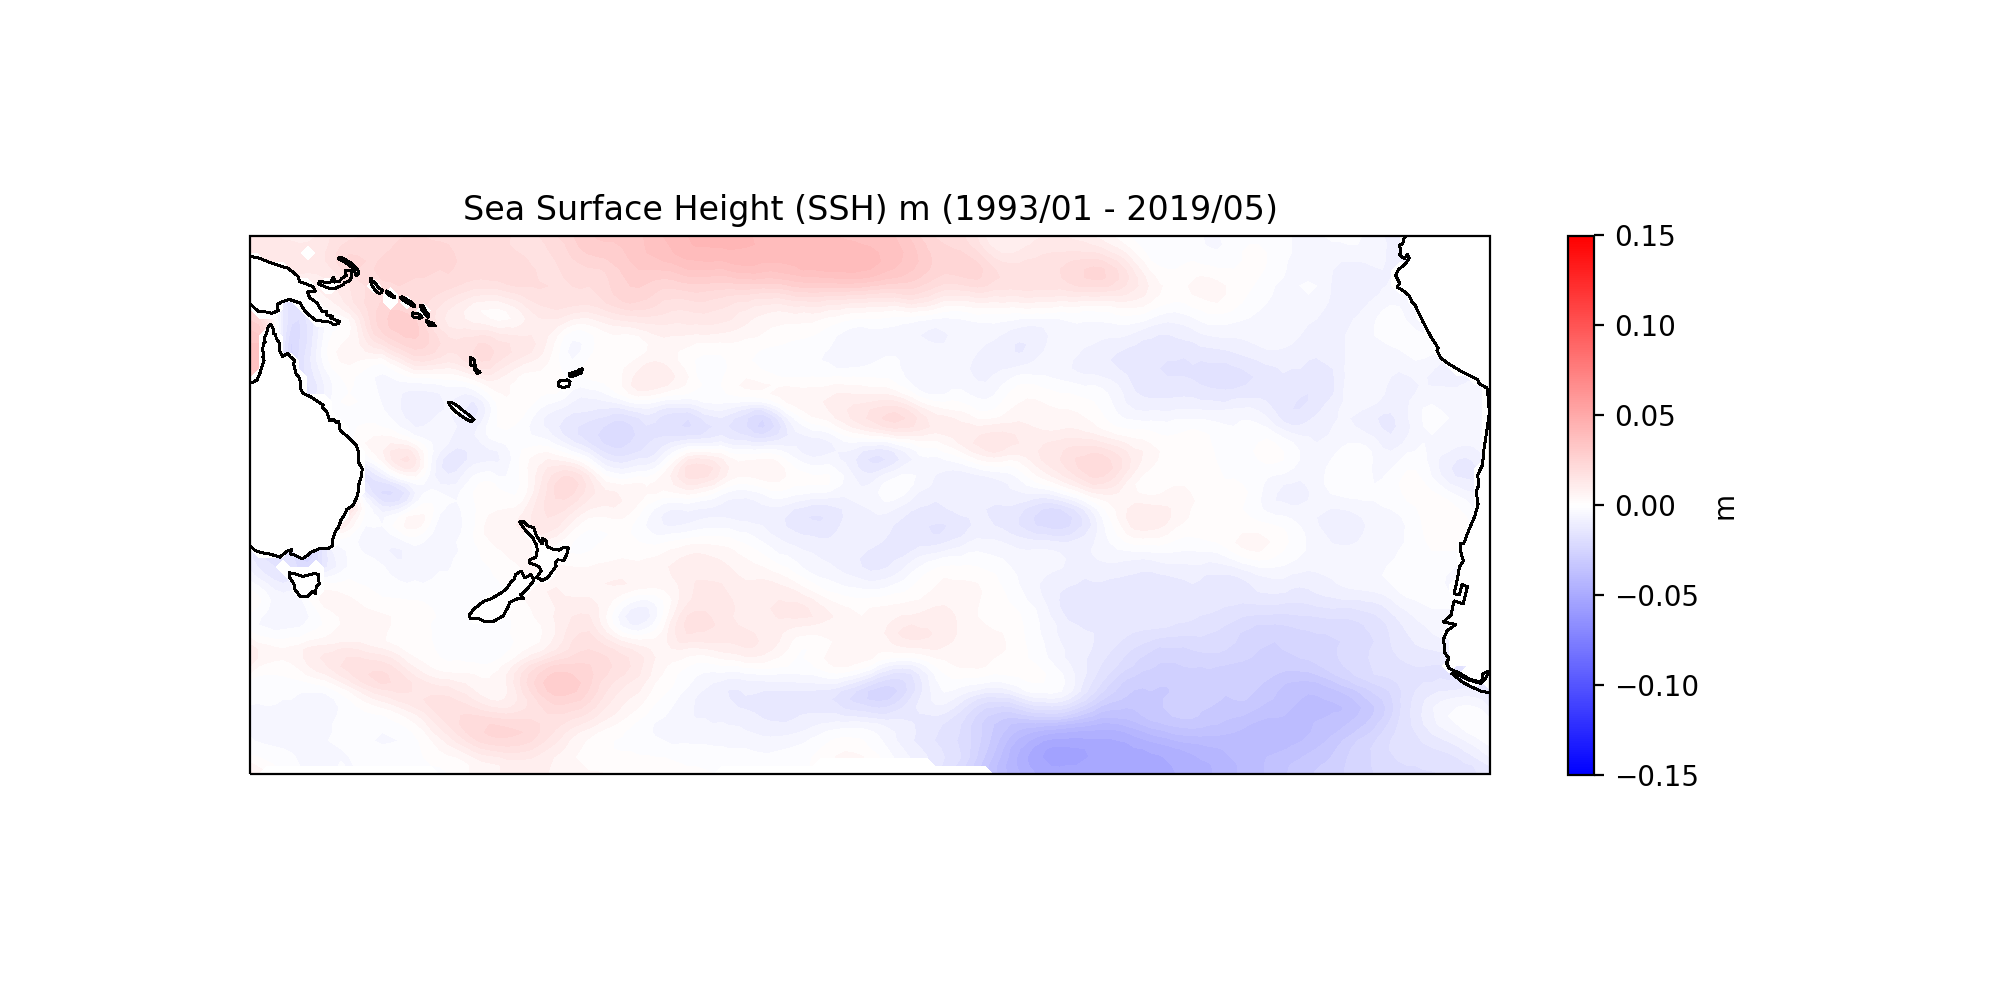

In [6]:
# Animation of the data
%matplotlib notebook
cmap = plt.cm.bwr
levels = np.arange(-.15,.15,0.01)
norm = mpl.colors.Normalize(vmin=-.15, vmax=.15)

lon, lat = np.meshgrid(lons, lats)
levels = np.arange(-0.4,0.41,0.01)

fig, ax = plt.subplots(figsize=(10,5),facecolor='w')
ax = plt.subplot(111, projection=PROJECTION)
ims = []

for i in range(len(height_minus_gm[:,0,0])):
#for i in range(2):
    Z = height_minus_gm[i,:,:]/1000
    im = ax.contourf(llons, llats, Z, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels)
    ax.set_title('Sea Surface Height (SSH) m (1993/01 - 2019/05)')
    ax.add_feature(cfeature.COASTLINE, linewidths=0.7)
    ims.append(im.collections)
    
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), shrink=.7)
cbar.set_label('m')
animation = ArtistAnimation(fig,ims,interval=200,repeat=True)
animation;

In [7]:
animation.save('../plots/day22_animation.gif',writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.
